# <font color=blue>OpenCV tutorial
### <font color=blue>Run every step by itself with no dependencies from previous

In [1]:
# Tutorial 001
# drawing lines / shapes / putting text on existing image
import numpy as np
import cv2

# Create an array (0,0,0) of 512 by 512 pixel to simulate a black image
img = np.zeros((512,512,3), np.uint8)
# Draw a diagonal blue line with thickness of 5 px
cv2.line(img,(0,0),(511,511),(255,0,0),5)
cv2.imshow('image',img)
cv2.waitKey(0)

#Square: top-left, bottom-right coordinates, 0,255,0 is green color, thickness 3
cv2.rectangle(img,(384,0),(510,128),(0,255,0),3)
cv2.imshow('image',img)
cv2.waitKey(0)

#Circle: center coordinates + radius
cv2.circle(img,(447,63), 63, (0,0,255), -1)
cv2.imshow('image',img)
cv2.waitKey(0)

#Eclipse
cv2.ellipse(img,(256,256),(100,50),0,0,180,255,-1)
cv2.imshow('image',img)
cv2.waitKey(0)

#Polylines
pts = np.array([[10,5],[20,30],[70,20],[50,10]], np.int32)
pts = pts.reshape((-1,1,2))
cv2.polylines(img,[pts],True,(0,255,255))
cv2.imshow('image',img)
cv2.waitKey(0)

#Put text
font = cv2.FONT_HERSHEY_SIMPLEX
cv2.putText(img,'OpenCV',(10,500), font, 4,(255,255,255),2,cv2.LINE_AA)
cv2.imshow('image',img)

k = cv2.waitKey(0)
if k == 27:         # wait for ESC key to exit
    cv2.destroyAllWindows()
elif k == ord('s'): # wait for 's' key to save and exit
    cv2.imwrite('messigray.png',img)
    cv2.destroyAllWindows()
else:               # in case user pressed any other key
    cv2.destroyAllWindows()


ModuleNotFoundError: No module named 'cv2'

In [8]:
# Tutorial 002
# accessing / modifying image pixels

import cv2
import numpy as np

img = cv2.imread('boardNorm-001.png')
px = img[100,100] #access to pixel at image coordinate 100, 100
print(px)         #print the BGR value of the pixel

# accessing only blue pixel
blue = img[100,100,0]   #coordinates x, y, [B(0),G(1),R(2)]
print(blue)

#numpy way of accessing pixel (computationally more efficient)
print(img.item(10,10,2))   #access pixel 10, 10 & red(2) value

#modify the red value to 100
img.itemset((10,10,2),100)
print(img.item(10,10,2))

#return tuple: height, width and channel (3 means BGR)
#if image is grayscale, result is only tuple: height & width
print(img.shape, img.size, img.dtype)  #size = number of pixels; dtype = datatype

[140  32 239]
140
41
100
(340, 408, 3) 416160 uint8


(340, 408, 3) 416160 uint8


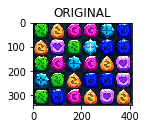

In [9]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('boardNorm-001.png')
plt.subplot(231),plt.imshow(img,'gray'),plt.title('ORIGINAL')
print(img.shape, img.size, img.dtype)  #size = number of pixels; dtype = datatype

No of shapes 11


<IPython.core.display.Javascript object>


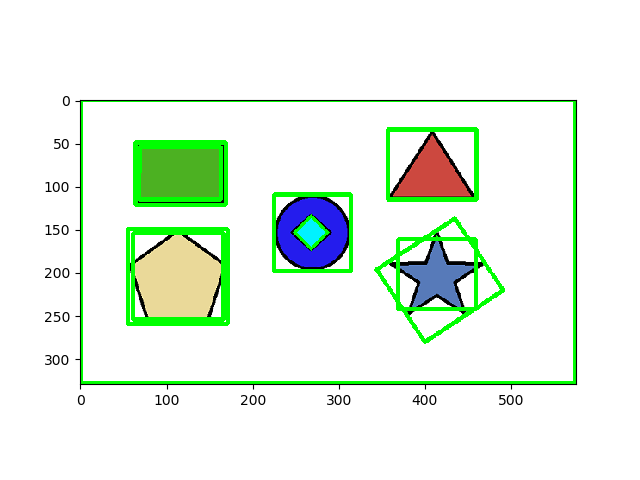

In [1]:
%matplotlib notebook
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('IMG.png')
image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
_, image = cv2.threshold(image,127,255,cv2.THRESH_BINARY)

_, contours, _ = cv2.findContours(image, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

print('No of shapes {0}'.format(len(contours)))

for cnt in contours:
    rect = cv2.minAreaRect(cnt)
    box = cv2.boxPoints(rect)
    box = np.int0(box)
    img = cv2.drawContours(img, [box], 0, (0, 255, 0), 3)

#plt.figure("Example 1")
plt.imshow(img)
#plt.title('Binary Contours in an image')
#plt.show()

In [12]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('IMG.png',0)
ret,thresh1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(img,127,255,cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO_INV)

titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

for i in xrange(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

plt.show()

NameError: name 'xrange' is not defined

In [9]:
# OpenCV Trackbar tutorial
# When switch is ON, the lower half color will change according to RGB values in track bar
# Reference: https://docs.opencv.org/3.0-beta/doc/py_tutorials/py_gui/py_trackbar/py_trackbar.html

import cv2
import numpy as np

def nothing(x):
    pass


#cv2.namedWindow('Trackbars')
#cv2.createTrackbar("L - H","Trackbars", 0, 179, nothing)
    
img = np.zeros((300, 512, 3), dtype=np.uint8)
cv2.namedWindow('image')

cv2.createTrackbar('R', 'image', 0, 255, nothing)
cv2.createTrackbar('G', 'image', 0, 255, nothing)
cv2.createTrackbar('B', 'image', 0, 255, nothing)

switch = "0: OFF___1: ON"
cv2.createTrackbar(switch, 'image', 0, 1, nothing)

while True:
    cv2.imshow('image', img)
    k = cv2.waitKey(1)
    
    if k == 27:
        break

    r = cv2.getTrackbarPos('R', 'image')
    g = cv2.getTrackbarPos('G', 'image')
    b = cv2.getTrackbarPos('B', 'image')
    s = cv2.getTrackbarPos(switch, 'image')
    
    if s == 0:
        img[:] = 0
    else:
        img[:] = [b, g, r]

cv2.destroyAllWindows()

In [6]:
# load image from URL & display in OpenCV image format
from PIL import Image
import numpy
import requests
from io import BytesIO
import cv2

#url = 'https://boygeniusreport.files.wordpress.com/2016/12/pokemon-go-cleffa-igglybuff.jpg?quality=98&strip=all&strip=all'
#url = 'https://github.com/KimChwee/Test/blob/master/threshold.png'
url = 'https://github.com/KimChwee/Test/blob/master/threshold.png?raw=true'

response = requests.get(url)
pil_image = Image.open(BytesIO(response.content))
#print(type(pil_image))
#pil_image.show()
#cv2.waitKey(0)

opencvImage = cv2.cvtColor(numpy.array(pil_image), cv2.COLOR_RGB2BGR)
cv2.imshow('Demo 2 Image',opencvImage)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [7]:
# another way to load image from URL
# this method does not work for github pictures *shrug*
from skimage import io
import cv2

# download the image using scikit-image
#url = 'https://github.com/KimChwee/Test/blob/master/threshold.png?raw=true'
url = 'https://www.pyimagesearch.com/wp-content/uploads/2015/01/opencv_logo.png'

image = io.imread(url)
cv2.imshow("Incorrect", image)
# skimage image format is BGR, openCV is RGB. So need to swap the columns
cv2.imshow("Correct", cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
cv2.waitKey(0)

-1

In [10]:
#combine loading picture from url with trackbar tutorial
from PIL import Image
import numpy
import cv2
import requests
from io import BytesIO

def nothing(x):
    pass
    
url = 'https://github.com/KimChwee/Test/blob/master/threshold.png?raw=true'

response = requests.get(url)
pil_image = Image.open(BytesIO(response.content))
img = cv2.cvtColor(numpy.array(pil_image), cv2.COLOR_RGB2BGR)

cv2.namedWindow('image')

cv2.createTrackbar('Threshold', 'image', 0, 255, nothing)

maxValue = 255

while True:
    thresh = cv2.getTrackbarPos('Threshold', 'image')
    th, dst = cv2.threshold(img, thresh, maxValue, cv2.THRESH_BINARY)
    cv2.imshow('image', dst)
    k = cv2.waitKey(1)
    
    if k == 27:
        break

cv2.destroyAllWindows()

In [1]:
# Capture a fixed portion of computer screen and save it as AVI file
import numpy as np
import cv2
from PIL import ImageGrab

fourcc = cv2.VideoWriter_fourcc('X','V','I','D') #you can use other codecs as well.
vid = cv2.VideoWriter('record.avi', fourcc, 8, (500,490))
while(True):
    img = ImageGrab.grab(bbox=(100, 10, 600, 500)) #x, y, w, h
    img_np = cv2.cvtColor(np.array(img), cv2.COLOR_RGB2BGR)
    #frame = cv2.cvtColor(img_np, cv2.COLOR_BGR2GRAY)
    vid.write(img_np)
    cv2.imshow("frame", img_np)
    key = cv2.waitKey(1)
    if key == 27:
        break    

vid.release()
cv2.destroyAllWindows()